In [488]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [608]:
path = "../../data/"
train_data = pd.read_csv(path + 'train_events.csv')
all_data = pd.read_csv(path + 'all_events.csv')
video = pd.read_csv(path + 'video_info_v2.csv')
targets = pd.read_csv(path + 'train_targets.csv')

In [609]:
train_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976


In [610]:
video.head()

,rutube_video_id,title,category,duration,author_id
0,video_185549,Как собрать букет из мыльных тюльпанов - Силик...,Хобби,1559160,1015054
1,video_111035,"Осторожно, Киберземляне!, 1 сезон, 12 серия",Сериалы,1320007,1002180
2,video_476517,ПОПУЛЯРНЫЕ ВИДЕОИГРЫ в LEGO... перевод - TD BR...,Хобби,606145,1095337
3,video_157198,"Хороший лжец (фильм, 2019)",Фильмы,6577440,1043618
4,video_289824,Нашего старого гнобят по-всякому,Развлечения,859493,1009535


In [611]:
import os
import sys

original_cwd = os.getcwd()

module_dir = os.path.abspath('../../utils')
os.chdir(module_dir)
sys.path.append(module_dir)
from get_localtime import add_tz_and_localtime_column
os.chdir(original_cwd)

train_data = add_tz_and_localtime_column(train_data)
all_data = add_tz_and_localtime_column(all_data)
all_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,local_time
0,2024-06-01 13:08:30+03:00,Tatarstan Republic,smartphone,browser,Android,Chrome Mobile,60,video_395879,10813370,Europe/Moscow,2024-06-01 13:08:30+03:00
1,2024-06-01 14:30:00+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,60,video_216518,10512324,Asia/Yekaterinburg,2024-06-01 16:30:00+05:00
2,2024-06-01 18:48:12+03:00,Novosibirsk Oblast,smartphone,mobile app,Android,Rutube,121,video_41225,10951137,Asia/Novosibirsk,2024-06-01 22:48:12+07:00
3,2024-06-01 16:32:36+03:00,Moscow,desktop,browser,Windows,Yandex Browser,2324,video_215886,10912434,Europe/Moscow,2024-06-01 16:32:36+03:00
4,2024-06-01 00:57:04+03:00,Moscow Oblast,smartphone,mobile app,Android,Rutube,6830,video_43631,10223585,Europe/Moscow,2024-06-01 00:57:04+03:00


In [612]:
train_data = train_data.merge(targets, on='viewer_uid')
train_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,local_time,age,sex,age_class
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,Asia/Yekaterinburg,2024-06-01 08:40:58+05:00,20,female,0
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,Asia/Yekaterinburg,2024-06-01 21:33:24+05:00,40,female,2
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,Europe/Moscow,2024-06-01 21:30:43+03:00,23,male,1
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,Europe/Moscow,2024-06-01 23:03:42+03:00,41,male,3
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,Europe/Moscow,2024-06-01 22:48:09+03:00,38,female,2


In [613]:
print("Total unique users in train data: ", train_data['viewer_uid'].nunique())
print("Total unique users in all data: ", all_data['viewer_uid'].nunique())

Total unique users in train data:  180012
Total unique users in all data:  960885


In [614]:
print("Total unique videos in train data: ", train_data['rutube_video_id'].nunique())
print("Total unique videos in all data: ", all_data['rutube_video_id'].nunique())

Total unique videos in train data:  126248
Total unique videos in all data:  324450


<Axes: xlabel='sex', ylabel='count'>

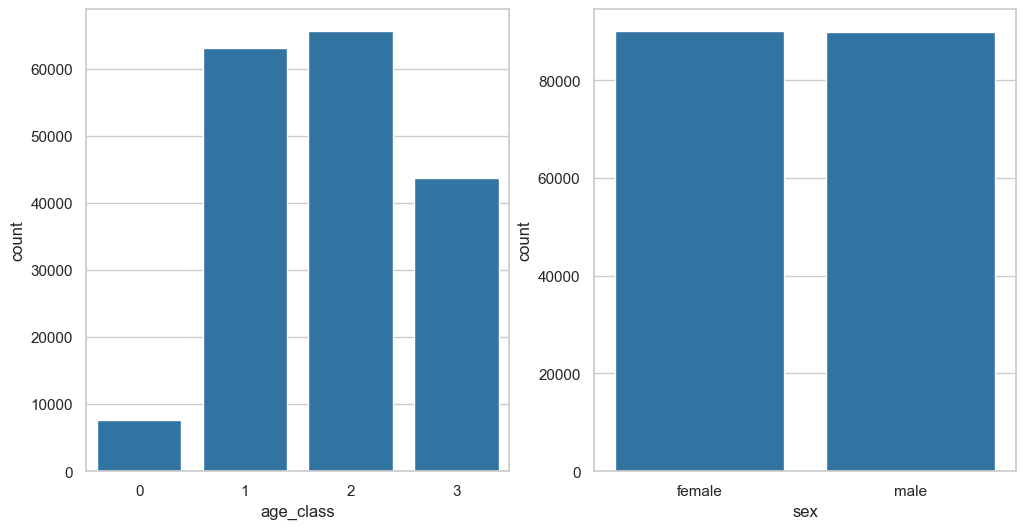

In [615]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='age_class', data=train_data.groupby('viewer_uid').first(), ax=ax[0])
sns.countplot(x='sex', data=train_data.groupby('viewer_uid').first(), ax=ax[1])

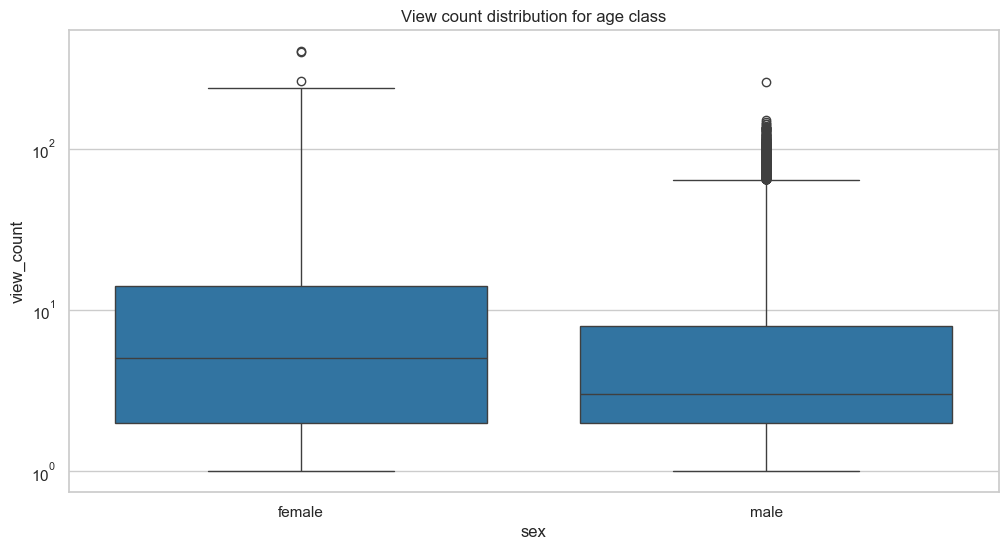

In [616]:
# View count distribution for age class and sex
view_count = train_data.groupby('viewer_uid').agg({'viewer_uid': 'count', 'age_class': 'first', 'sex': 'first'}).rename(columns={'viewer_uid': 'view_count'})

f, ax = plt.subplots(figsize=(12, 6))
ax.set_yscale("log")

sns.boxplot(x='sex', y='view_count', data=view_count)
plt.title("View count distribution for age class")
plt.show()


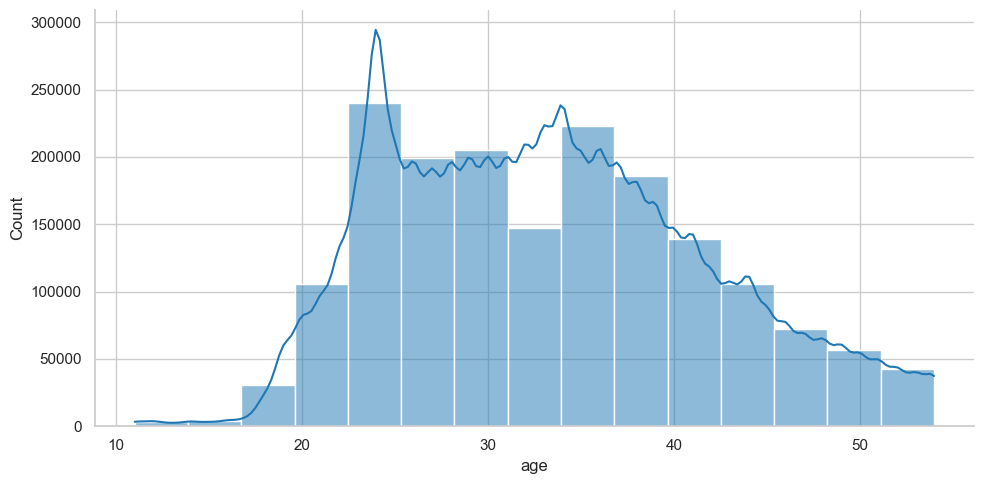

In [617]:
sns.displot(train_data['age'], bins=15, kde=True, aspect=2)
plt.show()

In [618]:
train_data = train_data.merge(video, on='rutube_video_id')
all_data = all_data.merge(video, on='rutube_video_id')
train_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,local_time,age,sex,age_class,title,category,duration,author_id
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,Asia/Yekaterinburg,2024-06-01 08:40:58+05:00,20,female,0,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,Asia/Yekaterinburg,2024-06-01 21:33:24+05:00,40,female,2,Comedy Club: Мальдивы | Андрей Бебуришвили,Юмор,519211,1006760
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,Europe/Moscow,2024-06-01 21:30:43+03:00,23,male,1,"Новая Битва экстрасенсов, 24 сезон, 11 выпуск",Телепередачи,5518280,1009257
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,Europe/Moscow,2024-06-01 23:03:42+03:00,41,male,3,Сергей Орлов-снял дом!!!,Разное,1522069,1058671
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,Europe/Moscow,2024-06-01 22:48:09+03:00,38,female,2,Ищем сокровища в Полевском | Уральская Флоренц...,Путешествия,1249920,1020020


/var/folders/94/nzsdn_8d0xq75jf__rhww7hr0000gn/T/ipykernel_38334/2605372372.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.displot(train_data[(train_data.percent_watched > 0) & (train_data.percent_watched <= 1)],


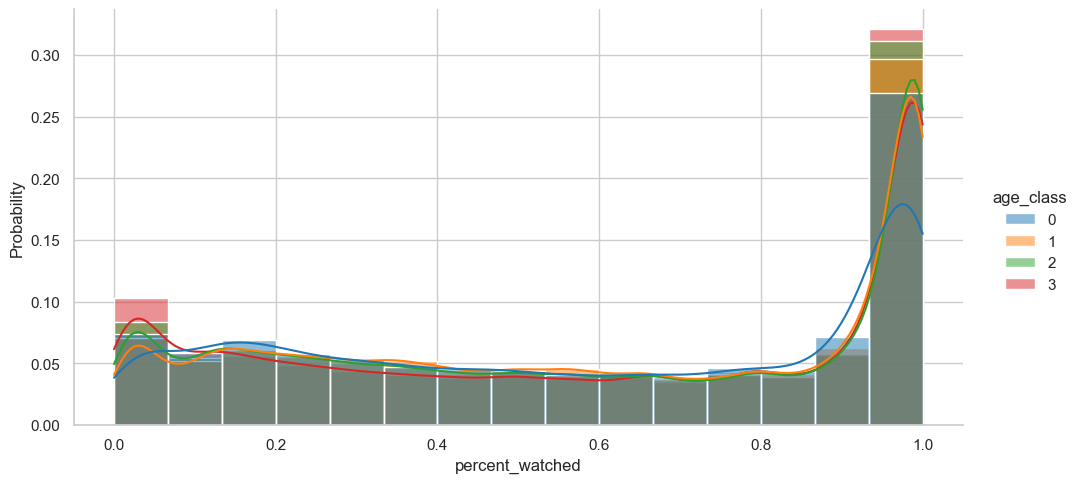

In [619]:
train_data['percent_watched'] = train_data['total_watchtime'] / train_data['duration'] * 1000
palette = sns.color_palette("tab10")
sns.displot(train_data[(train_data.percent_watched > 0) & (train_data.percent_watched <= 1)], 
            x="percent_watched", bins=15, kde=True, hue='age_class', 
            aspect=2, palette=palette, stat='probability', common_norm=False)
plt.show()

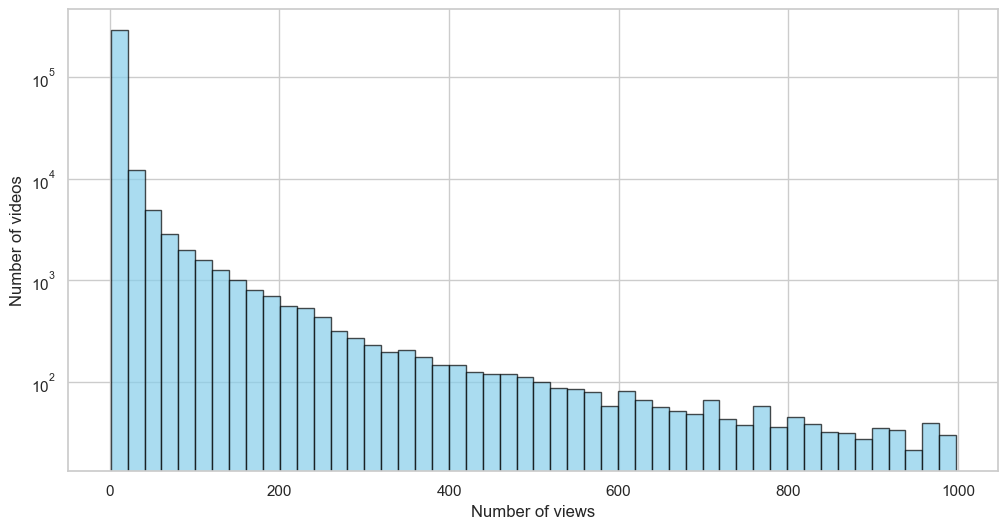

In [620]:
video_stats = all_data.groupby('rutube_video_id').size().reset_index(name='views')

plt.figure(figsize=(12, 6))
plt.hist(video_stats.query('views < 1000')['views'], 
         bins=50, color='skyblue', edgecolor='black', alpha=0.7, log=True)
plt.xlabel('Number of views')
plt.ylabel('Number of videos')
plt.show()

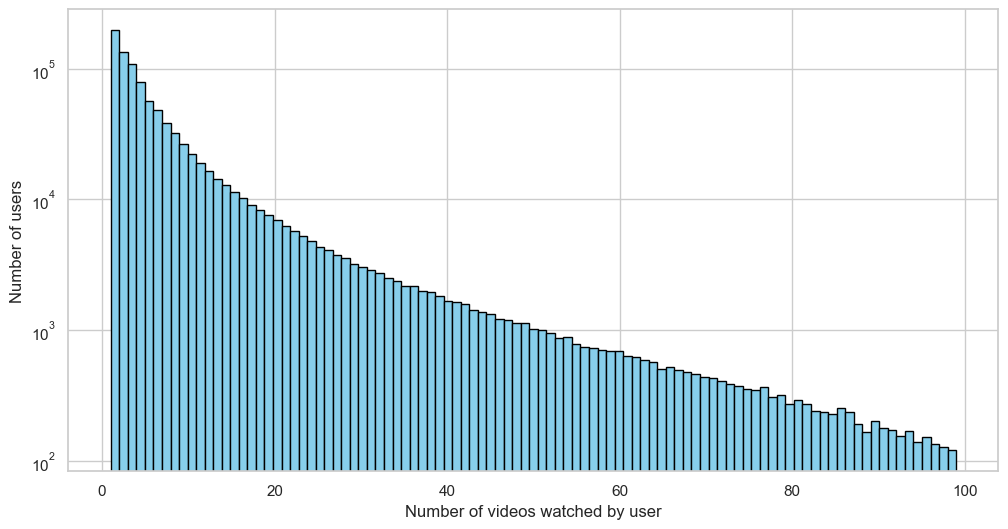

In [621]:
user_stats = all_data.groupby('viewer_uid').size().reset_index().rename(columns={0: 'num_videos_watched'})

plt.figure(figsize=(12, 6))
plt.hist(user_stats.query("num_videos_watched < 100")['num_videos_watched'], bins=99, log=True, color='skyblue', edgecolor='black')
plt.xlabel('Number of videos watched by user')
plt.ylabel('Number of users')

plt.show()

In [622]:
videos_popularity = all_data.groupby('rutube_video_id')['viewer_uid'].nunique()
videos_popularity.name = 'popularity'
all_data = all_data.merge(videos_popularity, on='rutube_video_id')
all_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,local_time,title,category,duration,author_id,popularity
0,2024-06-01 13:08:30+03:00,Tatarstan Republic,smartphone,browser,Android,Chrome Mobile,60,video_395879,10813370,Europe/Moscow,2024-06-01 13:08:30+03:00,ТАЙНА ДВОРЦОВОГО МОСТА В ПЕТЕРБУРГЕ | А ЧТО ПО...,Лайфстайл,333313,1012572,214
1,2024-06-01 14:30:00+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,60,video_216518,10512324,Asia/Yekaterinburg,2024-06-01 16:30:00+05:00,"Я художник, я так вижу. Мужское / Женское. Вып...",Телепередачи,2500274,1009219,437
2,2024-06-01 18:48:12+03:00,Novosibirsk Oblast,smartphone,mobile app,Android,Rutube,121,video_41225,10951137,Asia/Novosibirsk,2024-06-01 22:48:12+07:00,ДОРАМЫ ПРО ЛЮБОВЬ ♥ Романтические Фильмы ♥ Кор...,Фильмы,257997,1023998,1
3,2024-06-01 16:32:36+03:00,Moscow,desktop,browser,Windows,Yandex Browser,2324,video_215886,10912434,Europe/Moscow,2024-06-01 16:32:36+03:00,Менталист / The Mentalist – 4 сезон 13 серия,Сериалы,2363393,1074854,96
4,2024-06-01 00:57:04+03:00,Moscow Oblast,smartphone,mobile app,Android,Rutube,6830,video_43631,10223585,Europe/Moscow,2024-06-01 00:57:04+03:00,Сериал Тёмная материя – 1 сезон 4 серия / Dark...,Сериалы,3589376,1036095,334


100%|██████████| 100/100 [01:02<00:00,  1.59it/s]


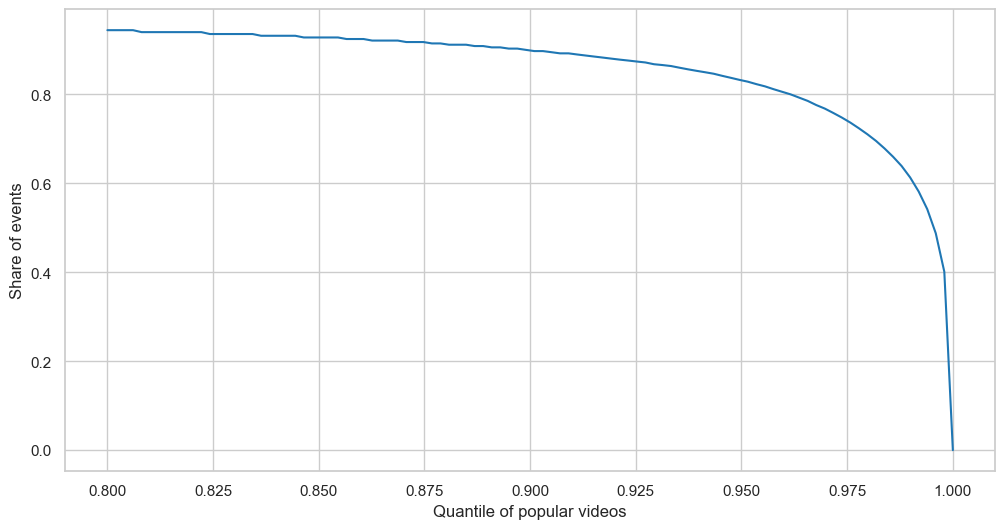

In [623]:
# Graph x - quantile of popular videos, y - share of events for this quantile
quantiles = np.linspace(0.8, 1, 100)
shares = []
for q in tqdm(quantiles):
    threshold = videos_popularity.quantile(q)
    shares.append(all_data.query(f'popularity > {threshold}').shape[0] / all_data.shape[0])
plt.figure(figsize=(12, 6))
plt.plot(quantiles, shares)
plt.xlabel('Quantile of popular videos')
plt.ylabel('Share of events')
plt.show()

100%|██████████| 100/100 [02:10<00:00,  1.30s/it]


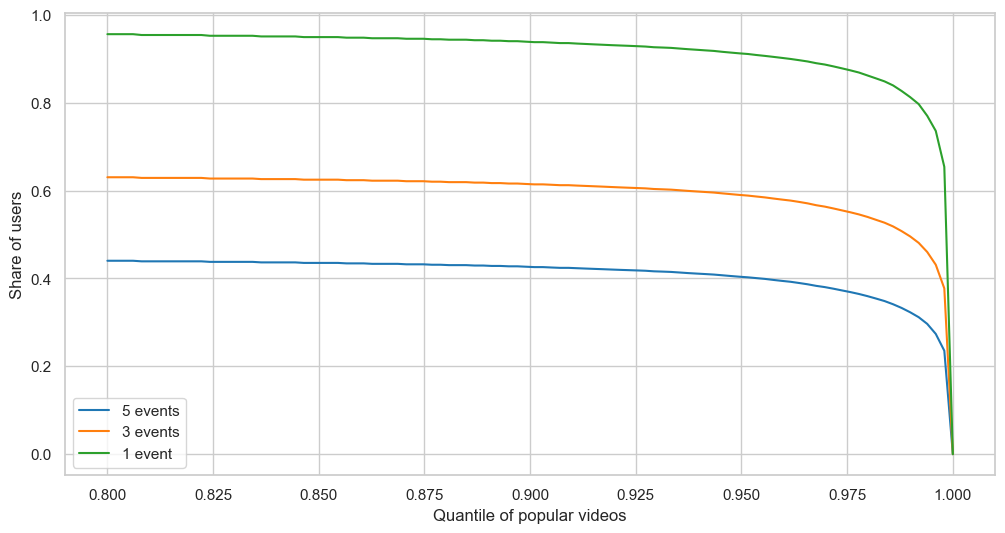

In [624]:
# x - quantile of popular videos, y - share of users that have at least 5 events for this quantile

quantiles = np.linspace(0.8, 1, 100)
shares_5 = []
shares_3 = []
shares_1 = []
for q in tqdm(quantiles):
    threshold = videos_popularity.quantile(q)
    all_data_filtered = all_data[all_data.popularity > threshold]
    shares_5.append(all_data_filtered.groupby('viewer_uid').size().reset_index().rename(columns={0: 'count'}).query('count >= 5').shape[0] / all_data['viewer_uid'].nunique())
    shares_3.append(all_data_filtered.groupby('viewer_uid').size().reset_index().rename(columns={0: 'count'}).query('count >= 3').shape[0] / all_data['viewer_uid'].nunique())
    shares_1.append(all_data_filtered['viewer_uid'].nunique() / all_data['viewer_uid'].nunique())
    
plt.figure(figsize=(12, 6))
plt.plot(quantiles, shares_5)
plt.plot(quantiles, shares_3)
plt.plot(quantiles, shares_1)
plt.legend(['5 events', '3 events', '1 event'])
plt.xlabel('Quantile of popular videos')
plt.ylabel('Share of users')
plt.show()

In [626]:
author_popularity = all_data.groupby('author_id')['viewer_uid'].nunique()
author_popularity.name = 'author_popularity'
all_data = all_data.merge(author_popularity, on='author_id')
all_data['author_popularity'].head()

0    19544
1    69809
2      164
3     1000
4     9619
Name: author_popularity, dtype: int64

100%|██████████| 100/100 [01:13<00:00,  1.37it/s]


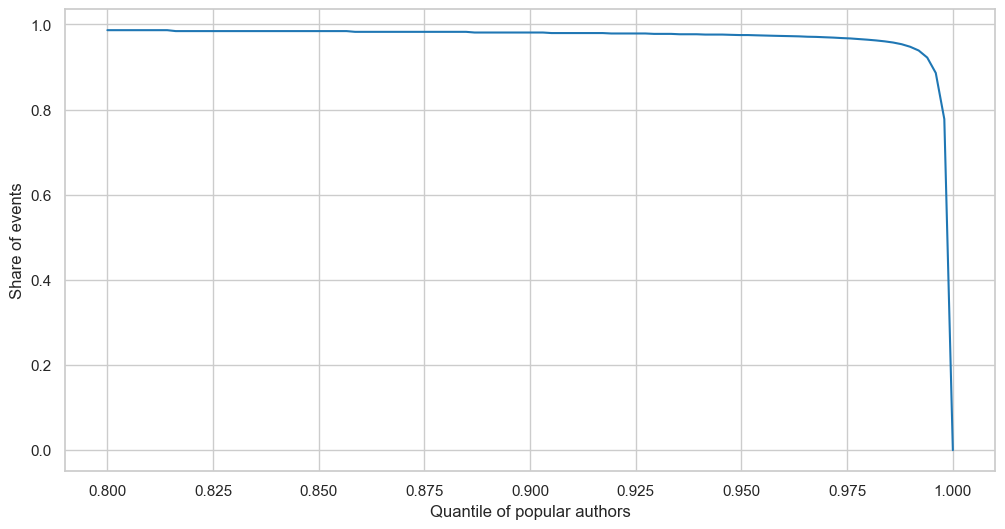

In [635]:
# Graph x - quantile of popular videos, y - share of events for this quantile
quantiles = np.linspace(0.8, 1, 100)
shares = []
for q in tqdm(quantiles):
    threshold = author_popularity.quantile(q)
    shares.append(all_data.query(f'author_popularity > {threshold}').shape[0] / all_data.shape[0])
plt.figure(figsize=(12, 6))
plt.plot(quantiles, shares)
plt.xlabel('Quantile of popular authors')
plt.ylabel('Share of events')
plt.show()

100%|██████████| 100/100 [02:26<00:00,  1.47s/it]


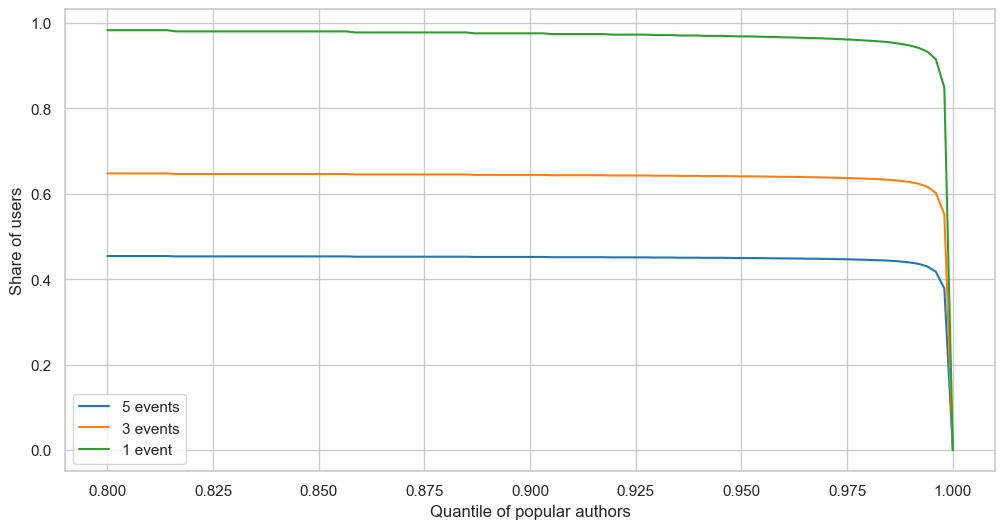

In [627]:
quantiles = np.linspace(0.8, 1, 100)
shares_5 = []
shares_3 = []
shares_1 = []
for q in tqdm(quantiles):
    threshold = author_popularity.quantile(q)
    all_data_filtered = all_data[all_data.author_popularity > threshold]
    shares_5.append(all_data_filtered.groupby('viewer_uid').size().reset_index().rename(columns={0: 'count'}).query('count >= 5').shape[0] / all_data['viewer_uid'].nunique())
    shares_3.append(all_data_filtered.groupby('viewer_uid').size().reset_index().rename(columns={0: 'count'}).query('count >= 3').shape[0] / all_data['viewer_uid'].nunique())
    shares_1.append(all_data_filtered['viewer_uid'].nunique() / all_data['viewer_uid'].nunique())
    
plt.figure(figsize=(12, 6))
plt.plot(quantiles, shares_5)
plt.plot(quantiles, shares_3)
plt.plot(quantiles, shares_1)
plt.legend(['5 events', '3 events', '1 event'])
plt.xlabel('Quantile of popular authors')
plt.ylabel('Share of users')
plt.show()

In [634]:
author_popularity.index.nunique()

83311

<Axes: >

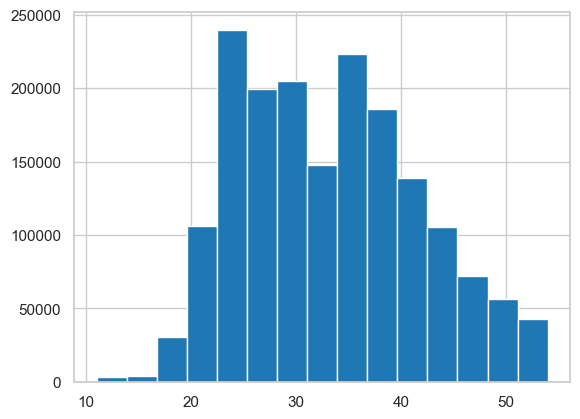

In [625]:
train_data.age.hist(bins=15)

In [244]:
train_data['hour'] = pd.to_datetime(train_data['local_time'].apply(lambda t: t.replace(tzinfo=None))).dt.hour
train_data['weekday'] = pd.to_datetime(train_data['local_time'].apply(lambda t: t.replace(tzinfo=None))).dt.weekday
train_data['holiday'] = train_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

(0.0, 24.0)

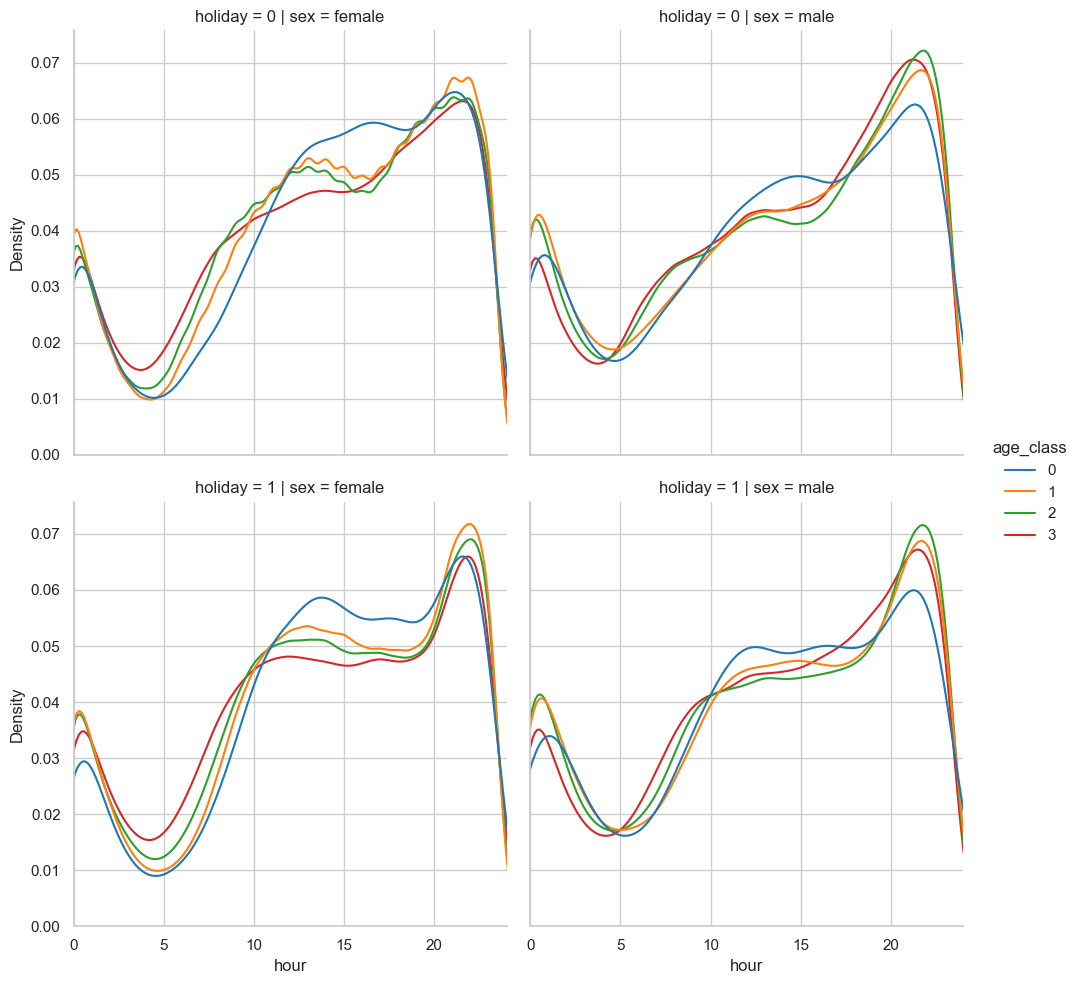

In [249]:
sns.displot(kind='kde', x='hour', data=train_data, palette='tab10',
            hue='age_class', common_norm=False, col='sex', row='holiday')
plt.xlim(0, 24)

<Axes: >

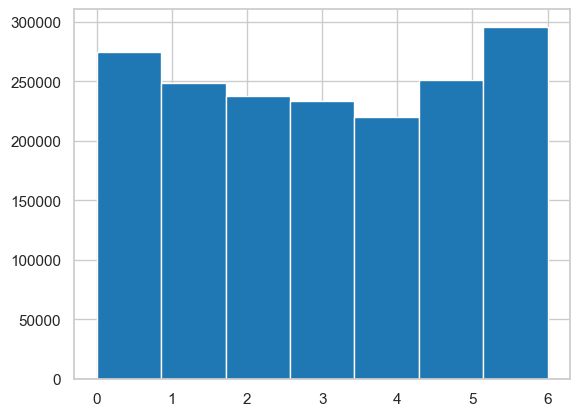

In [251]:
train_data.weekday.hist(bins=7)

## Названия видео

In [583]:
train_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,local_time,age,sex,age_class,title,category,duration,author_id
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,Asia/Yekaterinburg,2024-06-01 08:40:58+05:00,20,female,0,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,Asia/Yekaterinburg,2024-06-01 21:33:24+05:00,40,female,2,Comedy Club: Мальдивы | Андрей Бебуришвили,Юмор,519211,1006760
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,Europe/Moscow,2024-06-01 21:30:43+03:00,23,male,1,"Новая Битва экстрасенсов, 24 сезон, 11 выпуск",Телепередачи,5518280,1009257
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,Europe/Moscow,2024-06-01 23:03:42+03:00,41,male,3,Сергей Орлов-снял дом!!!,Разное,1522069,1058671
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,Europe/Moscow,2024-06-01 22:48:09+03:00,38,female,2,Ищем сокровища в Полевском | Уральская Флоренц...,Путешествия,1249920,1020020


In [584]:
random_uid = np.random.choice(train_data['viewer_uid'].unique(), 1)[0]
random_user_data = train_data[train_data['viewer_uid'] == random_uid]
random_user_data.head(10)

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,local_time,age,sex,age_class,title,category,duration,author_id
113872,2024-06-03 18:57:09+03:00,Orenburg Oblast,smartphone,mobile app,Android,Rutube,1267,video_123986,10126718,Asia/Yekaterinburg,2024-06-03 20:57:09+05:00,20,female,0,Гравити Фолз сезон 1 серия 7 «Диппер и атака к...,Сериалы,1299029,1043618
114121,2024-06-03 15:18:32+03:00,Orenburg Oblast,smartphone,mobile app,Android,Rutube,1258,video_221192,10126718,Asia/Yekaterinburg,2024-06-03 17:18:32+05:00,20,female,0,Гравити Фолз сезон 1 серия 6 «Диппер становитс...,Сериалы,1301077,1043618
299280,2024-06-06 13:01:47+03:00,Moscow,smartphone,mobile app,Android,Rutube,1240,video_222142,10126718,Europe/Moscow,2024-06-06 13:01:47+03:00,20,female,0,Гравити Фолз сезон 2 серия 20 «Странногеддон: ...,Сериалы,1269080,1043618
301467,2024-06-06 13:26:03+03:00,Moscow,smartphone,mobile app,Android,Rutube,1218,video_102376,10126718,Europe/Moscow,2024-06-06 13:26:03+03:00,20,female,0,Гравити Фолз сезон 2 серия 21 «Странногеддон: ...,Сериалы,1303062,1043618
862050,2024-06-15 15:58:36+03:00,Moscow,smartphone,mobile app,Android,Rutube,5389,video_57796,10126718,Europe/Moscow,2024-06-15 15:58:36+03:00,20,female,0,Путь домой | A Dog's Way Home (2019),Фильмы,5753793,1056177
1695194,2024-06-29 13:42:54+03:00,Moscow,smartphone,mobile app,Android,Rutube,2619,video_316010,10126718,Europe/Moscow,2024-06-29 13:42:54+03:00,20,female,0,"Новая Битва экстрасенсов, 24 сезон, 14 выпуск....",Телепередачи,5917000,1009257


In [585]:
titles = train_data['title'].tolist()

# Normalization and lemmatization

import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

nltk.download('stopwords')
mystem = Mystem()
russian_stopwords = stopwords.words("russian")
english_stopwords = stopwords.words("english")

def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords and token != " " and token.strip() not in punctuation]
    text = " ".join(tokens)
    return text

titles = [preprocess_text(title) for title in tqdm(titles)]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/flypew/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Installing mystem to /Users/flypew/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-macosx.tar.gz
100%|██████████| 1759616/1759616 [06:14<00:00, 4698.77it/s]


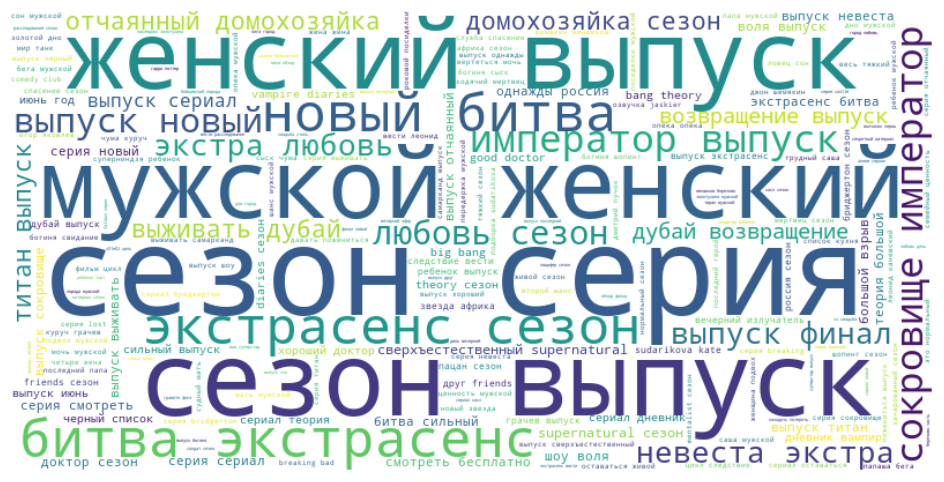

In [587]:
# Create word cloud for titles for different age classes and sexes

from wordcloud import WordCloud

def create_wordcloud(titles):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(titles))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
create_wordcloud(titles)

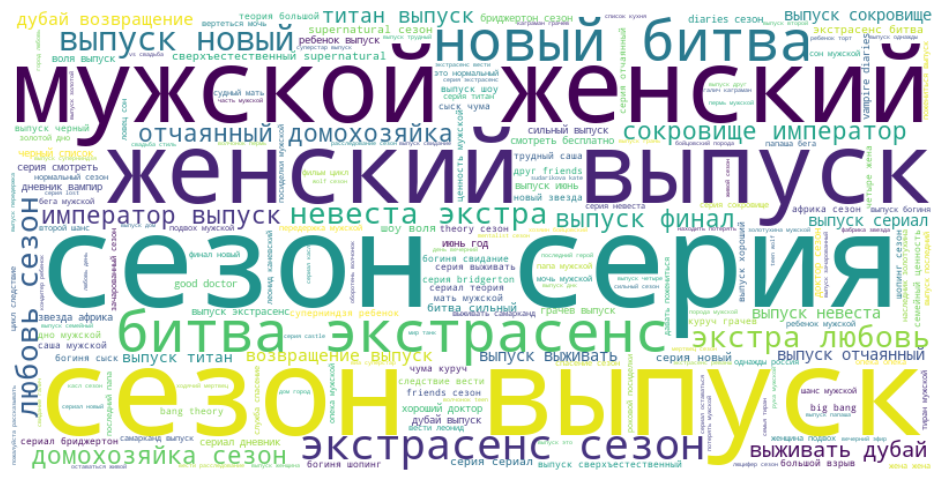

In [591]:
female_titles = np.array(titles)[train_data[train_data.sex == 'female'].index]
create_wordcloud(female_titles)

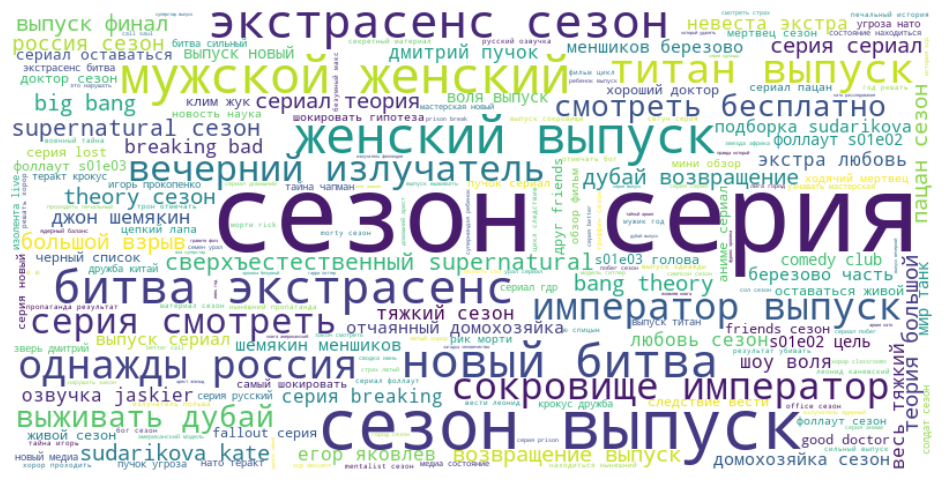

In [592]:
male_titles = np.array(titles)[train_data[train_data.sex == 'male'].index]
create_wordcloud(male_titles)

In [596]:
female_titles

array(['папа особенность мужской женский выпуск 20.05 2024',
       'comedy club мальдивы андрей бебуришвили',
       'искать сокровище полевский уральский флоренция  | « отпуск неподалеку 4 »\n',
       ..., 'экстрасенс битва сильный 7 выпуск', 'знать 1 сезон 3 серия',
       'коля коля николай мужской женский выпуск 14.02 2023'],
      dtype='<U123')

In [600]:
punctuation = punctuation + '«»—…“”*№–' + '0123456789'

In [601]:
# Count words in female/male titles
from collections import Counter

female_words = Counter(filter(lambda x: x not in punctuation, " ".join(female_titles).split()))
male_words = Counter(filter(lambda x: x not in punctuation, " ".join(male_titles).split()))

male_words.most_common(100)

[('сезон', 197317),
 ('серия', 184019),
 ('выпуск', 124872),
 ('сериал', 71085),
 ('2024', 70760),
 ('the', 36388),
 ('фильм', 35480),
 ('новый', 34297),
 ('россия', 26331),
 ('битва', 23454),
 ('24', 22764),
 ('женский', 22153),
 ('экстрасенс', 21622),
 ('мужской', 20954),
 ('часть', 19312),
 ('13', 16017),
 ('11', 15180),
 ('2023', 15018),
 ('10', 14200),
 ('смотреть', 13638),
 ('титан', 13292),
 ('однажды', 13217),
 ('мир', 12233),
 ('фоллаут', 11572),
 ('вечерний', 11391),
 ('выживать', 11186),
 ('сокровище', 11049),
 ('финал', 11033),
 ('император', 10961),
 ('излучатель', 10800),
 ('бесплатно', 10530),
 ('обзор', 10484),
 ('история', 10332),
 ('весь', 10227),
 ('большой', 10200),
 ('дубай', 9577),
 ('русский', 9473),
 ('хороший', 9464),
 ('любовь', 9361),
 ('2022', 9174),
 ('июнь', 9091),
 ('пацан', 9059),
 ('14', 9008),
 ('ребенок', 8958),
 ('сверхъестественный', 8950),
 ('supernatural', 8927),
 ('возвращение', 8837),
 ('год', 8617),
 ('теория', 8543),
 ('дмитрий', 8452),
 ('взр

In [602]:
female_words.most_common(100)

[('выпуск', 607483),
 ('сезон', 442615),
 ('серия', 261108),
 ('женский', 198432),
 ('мужской', 196853),
 ('2024', 155648),
 ('экстрасенс', 119881),
 ('битва', 116391),
 ('новый', 114694),
 ('24', 92223),
 ('сериал', 71348),
 ('13', 58270),
 ('любовь', 54840),
 ('11', 52354),
 ('the', 46569),
 ('невеста', 45494),
 ('экстра', 43401),
 ('выживать', 42539),
 ('домохозяйка', 42391),
 ('отчаянный', 42381),
 ('финал', 41848),
 ('сокровище', 40920),
 ('император', 40878),
 ('дубай', 36267),
 ('2023', 34729),
 ('титан', 32964),
 ('10', 30650),
 ('возвращение', 28682),
 ('ребенок', 25907),
 ('фильм', 25351),
 ('богиня', 24561),
 ('14', 24313),
 ('2021', 21342),
 ('год', 21188),
 ('шоу', 19833),
 ('хороший', 17731),
 ('жена', 17197),
 ('»:', 16931),
 ('сильный', 16150),
 ('сверхъестественный', 16100),
 ('supernatural', 16079),
 ('2020', 15779),
 ('звезда', 15606),
 ('15', 15485),
 ('воля', 15356),
 ('июнь', 14799),
 ('2019', 13701),
 ('черный', 13596),
 ('часть', 13399),
 ('свидание', 13371),
 (